# Project 1 - First Checkpoint, Gathering and Displaying Data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
bigdat=pd.read_csv(r'us-counties-2021.csv')
#print(dat1)
all_counties = bigdat['county'].tolist()
states = bigdat['state'].tolist()
all_cases = bigdat['cases'].tolist()
all_deaths = bigdat['deaths'].tolist()
in_cty_list = []
in_case_list = []
in_death_list = []

In [20]:
for i in range(len(all_counties)):
    if states[i] == "Indiana":
        in_cty_list.append(all_counties[i])
        in_case_list.append(all_cases[i])
        in_death_list.append(all_deaths[i])

In [41]:
mydat=pd.read_csv(r'mydat.csv')
mycty = mydat['County'].tolist()
mypol = mydat['O3 8-hr (ppm)'].tolist()
mymill = mydat['Steel Mill?'].tolist()

dat_cty = []
dat_cases = []
dat_deaths = []
avg_cty_cases = np.zeros(len(mycty))
avg_cty_deaths = np.zeros(len(mycty))
print(mycty)

['Allen', 'Bartholomew', 'Boone', 'Brown', 'Carroll', 'Clark', 'Delaware', 'Elkhart', 'Floyd', 'Greene', 'Hamilton', 'Hendrick', 'Howard', 'Knox', 'Lake', 'LaPorte', 'Marion', 'Perry', 'Porter', 'Posey', 'St. Joseph', 'Shelby', 'Vanderburgh', 'Vigo', 'Wabash', 'Warrick']


In [45]:
for i in range(len(mycty)):
    cty_case_sum = 0.
    cty_death_sum = 0.
    counter = 0.
    for j in range(len(in_cty_list)):
        if in_cty_list[j] == mycty[i]:
            cty_case_sum += in_case_list[j]
            cty_death_sum += in_death_list[j]
            counter += 1
    
    if counter >= 1:
        avg_cty_cases[i] = cty_case_sum/counter
        avg_cty_deaths[i] = cty_death_sum/counter


In [56]:
deaths_per_case = np.zeros(len(mycty))
for i in range(len(avg_cty_cases)):
    deaths_per_case[i] = avg_cty_deaths[i]/avg_cty_cases[i];

C:\Users\bcerm\AppData\Local\Temp/ipykernel_16724/3467591209.py:3: RuntimeWarning: invalid value encountered in double_scalars
  deaths_per_case[i] = avg_cty_deaths[i]/avg_cty_cases[i];


In [60]:
workable_dat = [[],[],[],[]]
for i in range(len(mycty)):
    for j in range(4):
        if avg_cty_cases[i] > 0 and j==0:
            workable_dat[j].append(mycty[i])
        if avg_cty_cases[i] > 0 and j==1:
            workable_dat[j].append((deaths_per_case[i])*100)
        if avg_cty_cases[i] > 0 and j==2:
            workable_dat[j].append(mypol[i])
        if avg_cty_cases[i] > 0 and j==3:
            workable_dat[j].append(mymill[i])


### I have now reformed the COVID data into a deaths per case percentage by county that has available air pollution (ozone) data from the EPA. This data is in a workable form that can be combined with my steel mill and pollution data.

#### The data list is in the form of [County, Death Rate (%), 8-hr Ozone Average Concentration (PPM), Steel Mill?]

In [61]:
print(workable_dat)

[['Allen', 'Bartholomew', 'Boone', 'Brown', 'Carroll', 'Clark', 'Delaware', 'Elkhart', 'Floyd', 'Greene', 'Hamilton', 'Howard', 'Knox', 'Lake', 'LaPorte', 'Marion', 'Perry', 'Porter', 'Posey', 'St. Joseph', 'Shelby', 'Vanderburgh', 'Vigo', 'Wabash', 'Warrick'], [1.5891433664980334, 1.7784162060852955, 1.4472881715487829, 3.5868284228769496, 1.2478915134936743, 1.4688876843965666, 1.7914684306223259, 1.5477109556777835, 2.164753627608256, 2.734332613838015, 1.1335638562768982, 2.0761518392805227, 1.9800447959391998, 1.8233593329108282, 1.7590078974676748, 1.7121862302542166, 2.0300148869485906, 1.6534509041739673, 1.1759552740907133, 1.5179736901558172, 1.6864825840749345, 1.618349482887018, 1.8744668257099675, 2.0402574554309343, 1.819236590289719], [0.065, 0.063, 0.065, 0.062, 0.066, 0.063, 0.064, 0.063, 0.064, 0.066, 0.065, 0.064, 0.069, 0.07, 0.072, 0.067, 0.064, 0.072, 0.059, 0.066, 0.065, 0.064, 0.063, 0.062, 0.066], ['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [98]:
yes_mills_deathrate = [list(['a','b','c']),list([0,0,0]),list([0,0,0])]
newcount = 0
for i in range(len(workable_dat[0])):
    if workable_dat[3][i] == "Yes":
        yes_mills_deathrate[1][newcount] = workable_dat[1][i]
        yes_mills_deathrate[2][newcount] = workable_dat[2][i]
        newcount += 1
            
#Manually inputting county names with a steel mill
yes_mills_deathrate[0][0] = 'Allen'
yes_mills_deathrate[0][1] = 'Lake'
yes_mills_deathrate[0][2] = 'Porter'

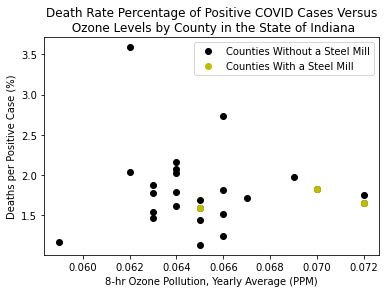

In [109]:
#print(yes_mills_deathrate)
plt.plot(workable_dat[2],workable_dat[1],'ko');
plt.plot(yes_mills_deathrate[2],yes_mills_deathrate[1],'yo');
plt.ylabel('Deaths per Positive Case (%)');
plt.xlabel('8-hr Ozone Pollution, Yearly Average (PPM)');
plt.title('Death Rate Percentage of Positive COVID Cases Versus\n Ozone Levels by County in the State of Indiana');
plt.legend(['Counties Without a Steel Mill','Counties With a Steel Mill']);